## ライブラリのインポート

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

## データを読み込む

**データを以下の所からダウンロード**

[NBA Top 50 All-Time Scorers](https://www.kaggle.com/datasets/isaienkov/nba-top-50-alltime-scorers)

In [2]:
df = pd.read_csv('nba.csv')
df

,rank,player,position,teams,total_points,total_games,points_per_game,field_goals,three_points_goals,free_shots,born,active_player,hall_of_fame,country
0,1,Kareem Abdul-Jabbar,C,Milwaukee Bucks (1969–1975)\nLos Angeles Laker...,38387,1560,24.6,15837,1,6712,1947,0,1995.0,USA
1,2,LeBron James,SF,"Cleveland Cavaliers (2003–2010, 2014–2018)\nMi...",37655,1388,27.1,13777,2189,7912,1984,1,NaN,USA
2,3,Karl Malone,PF,Utah Jazz (1985–2003)\nLos Angeles Lakers (200...,36928,1476,25.0,13528,85,9787,1963,0,2010.0,USA
3,4,Kobe Bryant,SG,Los Angeles Lakers (1996–2016),33643,1346,25.0,11719,1827,8378,1978-2020,0,2020.0,USA
4,5,Michael Jordan,SG,"Chicago Bulls (1984–1993, 1995–1998)\nWashingt...",32292,1072,30.1,12192,581,7327,1963,0,2009.0,USA
5,6,Dirk Nowitzki,PF/C,Dallas Mavericks (1998–2019),31560,1522,20.7,11169,1982,7240,1978,0,NaN,DEU
6,7,Wilt Chamberlain,C,Philadelphia/San Francisco Warriors (1959–1965...,31419,1045,30.1,12681,0,6057,1936-1999,0,1979.0,USA
7,8,Shaquille O'Neal,C,Orlando Magic (1992–1996)\nLos Angeles Lakers ...,28596,1207,23.7,11330,1,5935,1972,0,2016.0,USA
8,9,Carmelo Anthony,SF,Denver Nuggets (2003–2011)\nNew York Knicks (2...,28289,1260,22.5,10119,1731,6320,1984,1,NaN,USA
9,10,Moses Malone,C,Buffalo Braves (1976)\nHouston Rockets (1976–1...,27409,1329,20.6,9435,8,8531,1955-2015,0,2001.0,USA


In [3]:
df = df.drop(columns=['rank','player','teams','total_points','total_games','born','active_player','hall_of_fame','country'])
df.head()

,position,points_per_game,field_goals,three_points_goals,free_shots
0,C,24.6,15837,1,6712
1,SF,27.1,13777,2189,7912
2,PF,25.0,13528,85,9787
3,SG,25.0,11719,1827,8378
4,SG,30.1,12192,581,7327


## 欠損値の確認と処理

In [4]:
df.isnull().sum()

position              0
points_per_game       0
field_goals           0
three_points_goals    0
free_shots            0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   position            50 non-null     object 
 1   points_per_game     50 non-null     float64
 2   field_goals         50 non-null     int64  
 3   three_points_goals  50 non-null     int64  
 4   free_shots          50 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


## カテゴリの数を確認

In [6]:
df.nunique()

position              13
points_per_game       45
field_goals           50
three_points_goals    39
free_shots            50
dtype: int64

In [7]:
df['position'].value_counts()

C        9
SG       7
SF       6
PF/C     6
PG       5
SG/SF    4
PF       3
SG/PG    3
SF/PF    2
SF/SG    2
PG/SG    1
C/PF     1
PF/SF    1
Name: position, dtype: int64

In [8]:
position_rate_ = round(df['position'].value_counts() / len(df['position']), 2)
position_rate_

C        0.18
SG       0.14
SF       0.12
PF/C     0.12
PG       0.10
SG/SF    0.08
PF       0.06
SG/PG    0.06
SF/PF    0.04
SF/SG    0.04
PG/SG    0.02
C/PF     0.02
PF/SF    0.02
Name: position, dtype: float64

## Positionカテゴリの数値化

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
#Pisitionカテゴリを数値化
position_le = LabelEncoder()
position_le.classes_  = ['C', 'SG', 'SF', 'PF/C', 'PG', 'SG/SF', 'PF', 'SG/PG', 'SF/PF', 'SF/SG', 'PG/SG', 'C/PF', 'PF/SF']
df['position'] = position_le.transform(df['position'])
df

,position,points_per_game,field_goals,three_points_goals,free_shots
0,0,24.6,15837,1,6712
1,2,27.1,13777,2189,7912
2,6,25.0,13528,85,9787
3,1,25.0,11719,1827,8378
4,1,30.1,12192,581,7327
5,3,20.7,11169,1982,7240
6,0,30.1,12681,0,6057
7,0,23.7,11330,1,5935
8,2,22.5,10119,1731,6320
9,0,20.6,9435,8,8531


## データ間の相関係数を求める

In [11]:
df_corr = df.corr()
df_corr

,position,points_per_game,field_goals,three_points_goals,free_shots
position,1.000000,-0.069344,-0.313812,0.121967,-0.112661
points_per_game,-0.069344,1.000000,0.346892,-0.102906,0.547283
field_goals,-0.313812,0.346892,1.000000,-0.189665,0.492758
three_points_goals,0.121967,-0.102906,-0.189665,1.000000,-0.072149
free_shots,-0.112661,0.547283,0.492758,-0.072149,1.000000


<AxesSubplot: >

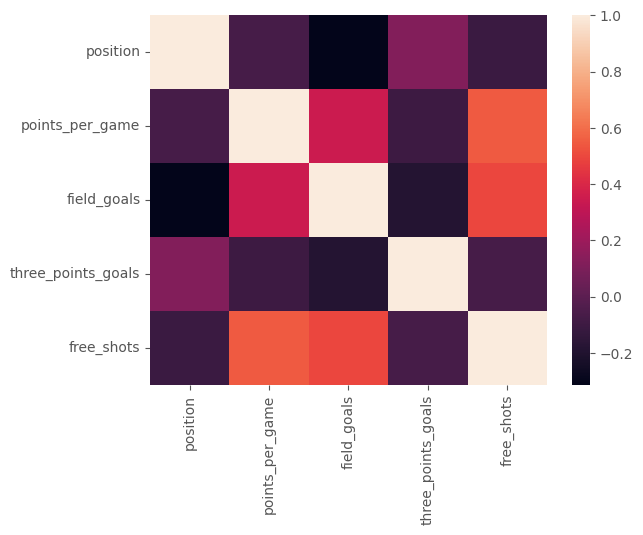

In [12]:
sns.heatmap(df_corr)

**相関関係から分かった見地**

1. ポジションと得点項目に相関関係はない
2. フリースローの得点数と一試合あたりの得点率及びゴール数に高い相関性が見られた。